# Class Notebook

This Jupyter notebook has only the reason to follow the class calculations and examples.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline

## Intro to Scikit Learn

This notebook aims to show three different classifiers:

* K Nearest Neighbors
* AdaBoost
* Random Forest

In [2]:
# Importing the K Nearest Neighbors from Scikit learn package.
from sklearn.neighbors import KNeighborsClassifier

# Importing the AdaBoost from Scikit learn package.
from sklearn.ensemble import AdaBoostClassifier

# Importing the Random Forest from Scikit learn package.
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Defining a function to plot graph.
def plot_graph(x_1, y_1, x_2, y_2, title, fig_x = 8, fig_y = 8):
    plt.figure(figsize = (fig_x,fig_y));
    plt.scatter(x = x_1, y = y_1);
    plt.scatter(x = x_2, y = y_2);
    plt.xlabel('x axis', fontsize = 14);
    plt.ylabel('y axis', fontsize = 14);
    plt.title(title, fontsize = 18);
    plt.legend(['Type 1','Type 2'])
    plt.show()

### Creating the dataframes

In [4]:
import random

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

In [5]:
# Creating data to use in my example.
features_train, labels_train, features_test, labels_test = makeTerrainData()

### Plotting the Training Dataframe

In [6]:
# Initializing a Dataframe.
df_5 = pd.DataFrame()

# Adding the X values.
df_5[['x', 'y']] = pd.DataFrame(features_train)

# Adding the predicted values.
df_5['result'] = labels_train


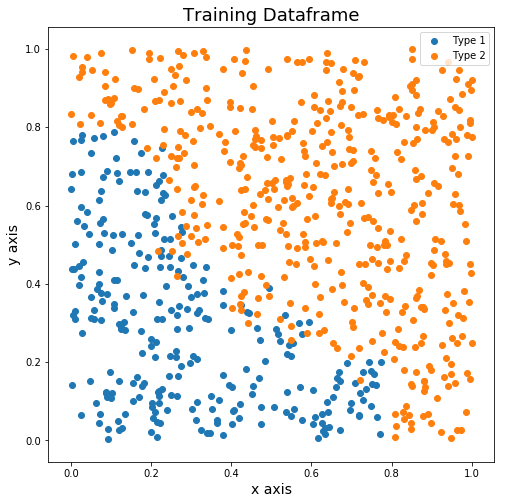

In [7]:
# Plotting the points.
plot_graph(x_1 = df_5.query('result == 0').x,
           y_1 = df_5.query('result == 0').y,
           x_2 = df_5.query('result == 1').x,
           y_2 = df_5.query('result == 1').y,
           title = 'Training Dataframe')

## K Nearest Neighbors

In [8]:
# Creating the classifier.
clf = KNeighborsClassifier(n_neighbors=5)

# Training or fitting the model.
clf.fit(features_train, labels_train)

# Predicting
pred = clf.predict(features_test)

#### Accuracy Calculation

In [9]:
from sklearn.metrics import accuracy_score

# Calculating the accurary using the built-in method.
accuracy = accuracy_score(pred, labels_test)

# Printing the accurary proportion.
accuracy

0.92

#### Plotting

In [10]:
# Initializing a Dataframe.
df_2 = pd.DataFrame()

# Adding the X values.
df_2[['x', 'y']] = pd.DataFrame(features_test)

# Adding the predicted values.
df_2['result'] = pred

# Printing the first 5 rows.
df_2.head()

,x,y,result
0,0.323274,0.325050,0.0
1,0.970185,0.662227,1.0
2,0.404175,0.525477,1.0
3,0.514596,0.313753,0.0
4,0.988119,0.173182,1.0


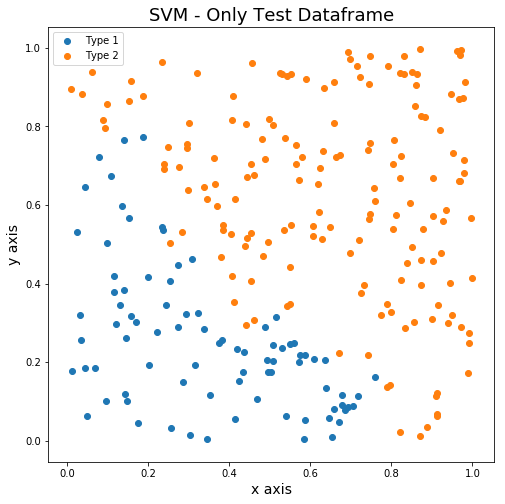

In [20]:
# Plotting the points.
plot_graph(x_1 = df_2.query('result == 0').x,
           y_1 = df_2.query('result == 0').y,
           x_2 = df_2.query('result == 1').x,
           y_2 = df_2.query('result == 1').y,
           title = 'SVM - Only Test Dataframe')

## AdaBoost

In [12]:
# Creating the classifier.
clf = AdaBoostClassifier()

# Training or fitting the model.
clf.fit(features_train, labels_train)

# Predicting
pred = clf.predict(features_test)

#### Accuracy Calculation

In [13]:
# Calculating the accurary using the built-in method.
accuracy = accuracy_score(pred, labels_test)

# Printing the accurary proportion.
accuracy

0.924

#### Plotting

In [14]:
# Initializing a Dataframe.
df_2 = pd.DataFrame()

# Adding the X values.
df_2[['x', 'y']] = pd.DataFrame(features_test)

# Adding the predicted values.
df_2['result'] = pred

# Printing the first 5 rows.
df_2.head()

,x,y,result
0,0.323274,0.325050,0.0
1,0.970185,0.662227,1.0
2,0.404175,0.525477,1.0
3,0.514596,0.313753,0.0
4,0.988119,0.173182,1.0


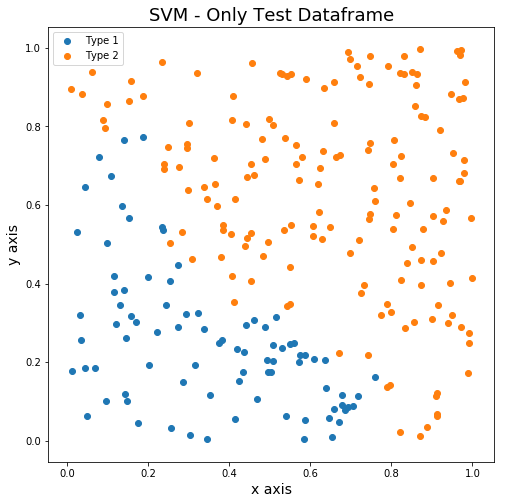

In [15]:
# Plotting the points.
plot_graph(x_1 = df_2.query('result == 0').x,
           y_1 = df_2.query('result == 0').y,
           x_2 = df_2.query('result == 1').x,
           y_2 = df_2.query('result == 1').y,
           title = 'SVM - Only Test Dataframe')

## Random Forest

In [16]:
# Creating the classifier.
clf = RandomForestClassifier(n_estimators = 100)

# Training or fitting the model.
clf.fit(features_train, labels_train)

# Predicting
pred = clf.predict(features_test)

#### Accuracy Calculation

In [17]:
# Calculating the accurary using the built-in method.
accuracy = accuracy_score(pred, labels_test)

# Printing the accurary proportion.
accuracy

0.912

#### Plotting

In [18]:
# Initializing a Dataframe.
df_2 = pd.DataFrame()

# Adding the X values.
df_2[['x', 'y']] = pd.DataFrame(features_test)

# Adding the predicted values.
df_2['result'] = pred

# Printing the first 5 rows.
df_2.head()

,x,y,result
0,0.323274,0.325050,0.0
1,0.970185,0.662227,1.0
2,0.404175,0.525477,1.0
3,0.514596,0.313753,0.0
4,0.988119,0.173182,1.0


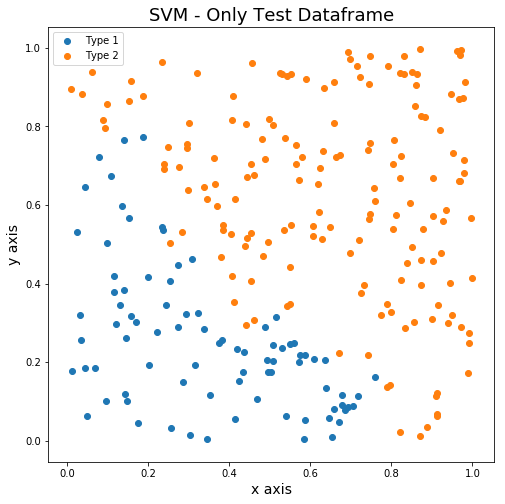

In [19]:
# Plotting the points.
plot_graph(x_1 = df_2.query('result == 0').x,
           y_1 = df_2.query('result == 0').y,
           x_2 = df_2.query('result == 1').x,
           y_2 = df_2.query('result == 1').y,
           title = 'SVM - Only Test Dataframe')